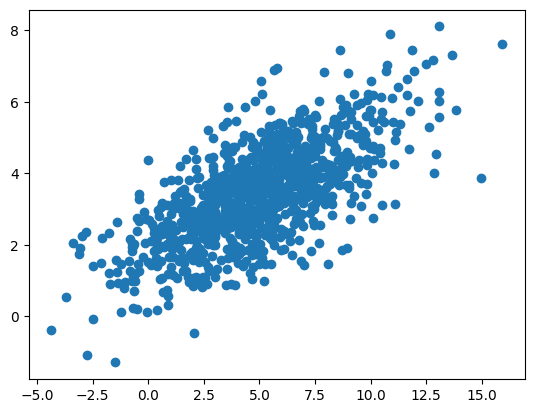

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
num_samples = 1000

x = np.random.normal(5, 3, num_samples)
y = 0.3*x + np.random.normal(2, 1, num_samples)

plt.scatter(x, y)
plt.show()


1. Eulcideian Distance 


      i. Distance

     ii. Threshold assumed 
     
    iii. detecting outliers: if eulcideian distance > threshold (then add into the outliers) 

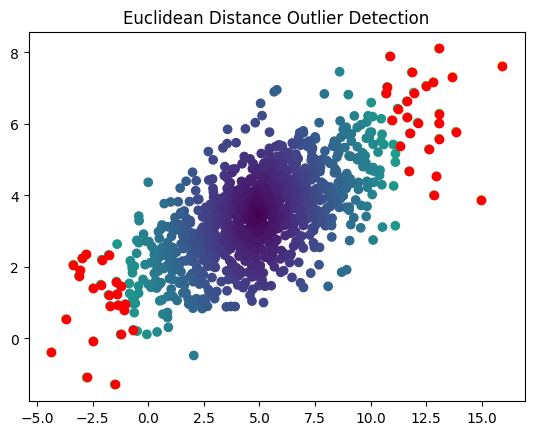

In [22]:
data = np.vstack((x, y)).T
mean_x = np.mean(x)
mean_y = np.mean(y)
euclideian_dist = np.sqrt((x-mean_x)**2 + (y - mean_y)**2)
threshold_euclidean = np.percentile(euclideian_dist, 95)
outliers_euclidean = data[euclideian_dist > threshold_euclidean]
plt.title('Euclidean Distance Outlier Detection')
plt.scatter(x, y, c=euclideian_dist)
plt.scatter(outliers_euclidean[:, 0], outliers_euclidean[:, 1], color='red')
plt.show()

2. Mahalanobis Distance 

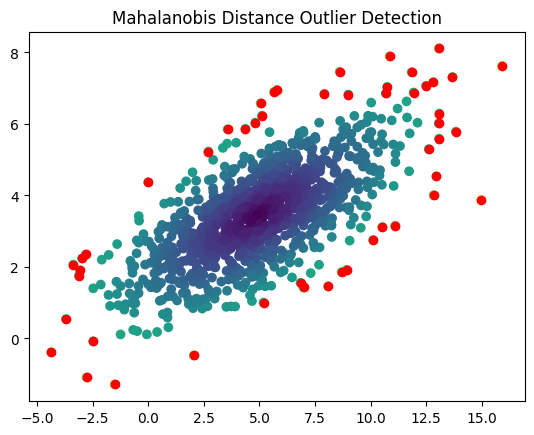

In [23]:
mean_vector = np.array([mean_x, mean_y])
S = np.cov(data, rowvar=False)
S_inverse =  np.linalg.inv(S)

mahal_dist = []
for i in data:
    diff = i - mean_vector
    distance = np.sqrt(diff.T @ S_inverse @ diff)
    mahal_dist.append(distance)
mahal_dist = np.array(mahal_dist)


threshold_mahalanobis = np.percentile(mahal_dist, 95)
outliers_mahalanobis = data[mahal_dist > threshold_mahalanobis]

plt.title('Mahalanobis Distance Outlier Detection')
plt.scatter(x, y, c=mahal_dist)
plt.scatter(outliers_mahalanobis[:, 0], outliers_mahalanobis[:, 1], color='red')

plt.show()

Comapre

[[-1.51328975 -1.28773022]
 [13.07411024  5.58759237]
 [-3.06584218  1.90135421]
 [13.05960971  6.01750655]
 [13.82866702  5.78637431]
 [-4.36376606 -0.38579082]
 [-2.77283484 -1.09197054]
 [13.06063815  8.11188114]
 [12.95714977  4.53484665]
 [12.61180283  5.29486057]
 [-2.47177631 -0.08103254]
 [12.81159593  7.16958791]
 [-2.97037113  2.24063301]
 [-3.70141086  0.54087109]
 [10.68069982  6.8544873 ]
 [-2.80646931  2.34920972]
 [10.8571928   7.88995366]
 [10.73716794  7.03611193]
 [12.8314708   4.00495544]
 [13.08682942  6.29136575]
 [11.84159598  7.45024846]
 [15.90655699  7.62267811]
 [-3.11703037  1.7564142 ]
 [13.6783688   7.31354419]
 [12.48959433  7.07112388]
 [-3.36769454  2.06739089]
 [14.97105877  3.87294682]
 [11.93300477  6.87955548]]


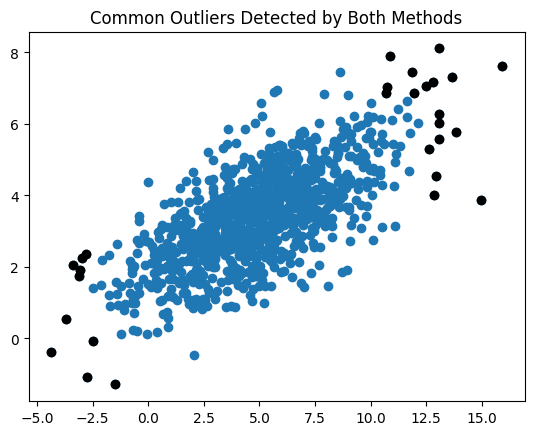

In [24]:
common_outliers = [];
for i in range(num_samples):
    if euclideian_dist[i] > threshold_euclidean and mahal_dist[i] > threshold_mahalanobis:
        common_outliers.append(data[i])

common_outliers = np.array(common_outliers) 
print(common_outliers)
plt.title('Common Outliers Detected by Both Methods')
plt.scatter(x, y)

if len(common_outliers) > 0:
    plt.scatter(common_outliers[:, 0], common_outliers[:, 1], color='black')
    
plt.show()

PART 2

Making a fucntion fro Mahalonobis and not Eulcideian

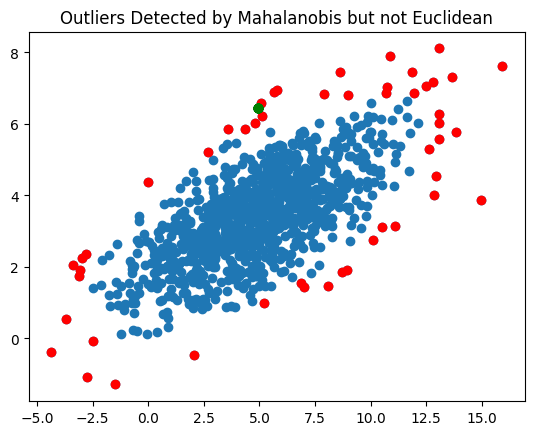

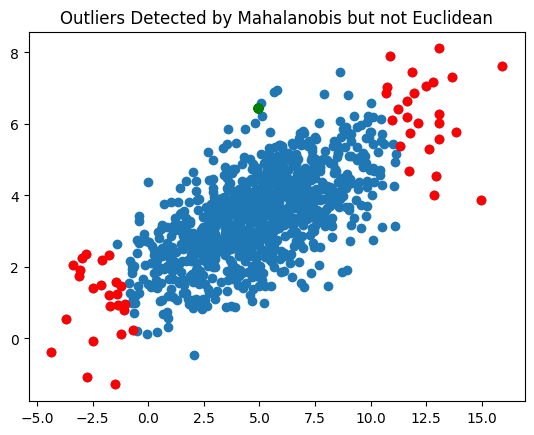

In [26]:
def mahal_only(data, num_points=10, x_mean_close=0, y_mean_close=10):
    mean_vector = np.mean(data, axis=0)

    new_points = []
    for _ in range(num_points):
        new_x = mean_vector[0] + x_mean_close
        new_y = mean_vector[1] + y_mean_close
        new_points.append([new_x, new_y])

    return np.array(new_points)

new_outliers = mahal_only(data, num_points=20, x_mean_close=0, y_mean_close=3)
new_data = np.vstack((data, new_outliers))


plt.scatter(new_data[:,0], new_data[:,1] )
plt.scatter(outliers_mahalanobis[:, 0], outliers_mahalanobis[:, 1], color='red')
if len(new_outliers) > 0:
    plt.scatter(new_outliers[:,0], new_outliers[:,1], color='green')
plt.title("Outliers Detected by Mahalanobis but not Euclidean")
plt.show()


plt.scatter(new_data[:,0], new_data[:,1] )
plt.scatter(outliers_euclidean[:, 0], outliers_euclidean[:, 1], color='red')
if len(new_outliers) > 0:
    plt.scatter(new_outliers[:,0], new_outliers[:,1], color='green')
plt.title("Outliers Detected by Mahalanobis but not Euclidean")
plt.show()
